In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [6]:
X = df.drop(['TARGET CLASS'], axis=1)
y = df['TARGET CLASS']

In [7]:
# Standardization methods
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.30, random_state=45)

In [9]:
# Apply into KNN clasifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[141   8]
 [ 10 141]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       149
           1       0.95      0.93      0.94       151

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [12]:
err_rate = []
for x in range(1, 40):
    Knn = KNeighborsClassifier(n_neighbors=x)
    Knn.fit(X_train, y_train)
    pred = Knn.predict(X_test)
    err_rate.append(np.mean(pred != y_test))

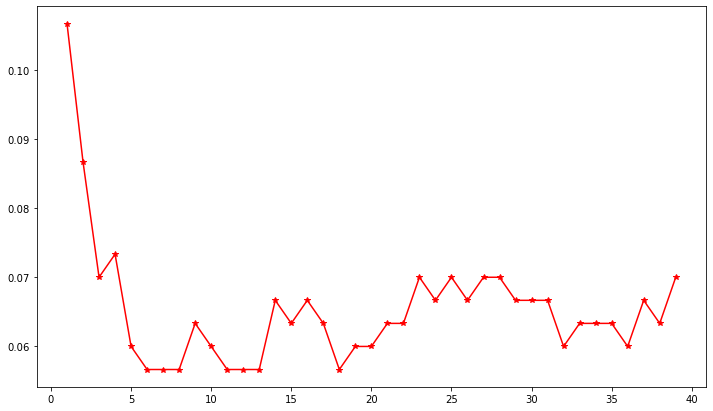

In [13]:
plt.figure(figsize=(12, 7))
plt.plot(range(1, 40), err_rate, marker='*', color='red')

In [18]:
# Applying into KNN clasifier after finding K value
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=12, weights='uniform')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[141   8]
 [  9 142]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       149
           1       0.95      0.94      0.94       151

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

